In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and Arial font
sns.set_theme(style="darkgrid")
plt.rcParams["font.family"] = "Arial"

# Create GeoDataFrame
#geometry = [Point(xy) for xy in zip(merged_all['longitude'], merged_all['latitude'])]
#gdf = gpd.GeoDataFrame(merged_all, geometry=geometry)
#gdf.set_crs(epsg=4326, inplace=True)



In [107]:
df1 = pd.read_csv('Llava_final/japan/city_count_remian_llava_mmi.csv')
df2 = pd.read_csv('qwen_final/japan/city_count_remian_qwen_mmi.csv')
df3 = pd.read_csv('Gemini_final/japan/city_count_remian_gemini_mmi.csv')

df1 = df1[['Unnamed__0', 'user_name', 'time', 'damage_level', 'City', 'State_Region', 'Latitude_1', 'Longitude_1','MMI_numeric']]
df2 = df2[['Unnamed__0', 'user_name', 'time', 'damage_level', 'City', 'State_Region', 'Latitude_1', 'Longitude_1','MMI_numeric']]
df3 = df3[['Unnamed__0', 'time', 'damage_level', 'City', 'State_Region', 'Latitude_1', 'Longitude_1','MMI_numeric']]

df1 = df1.rename(columns={'damage_level': 'llava_damage_level','Latitude_1': 'latitude', 'Longitude_1': 'longitude'})
df2 = df2.rename(columns={'damage_level': 'qwen_damage_level','Latitude_1': 'latitude', 'Longitude_1': 'longitude'})
df3 = df3.rename(columns={'damage_level': 'gemini_damage_level','Latitude_1': 'latitude', 'Longitude_1': 'longitude'})

#df1 = df1.dropna(subset=['City'])
#df2 = df2.dropna(subset=['City'])
#df3 = df3.dropna(subset=['City'])


C:\Users\missa\AppData\Local\Temp\ipykernel_40180\3940285079.py:3: DtypeWarning: Columns (21,47,48,49,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('Gemini_final/japan/city_count_remian_gemini_mmi.csv')


In [68]:
print(len(df1))
print(len(df2))
print(len(df3))



30054
22308
33132


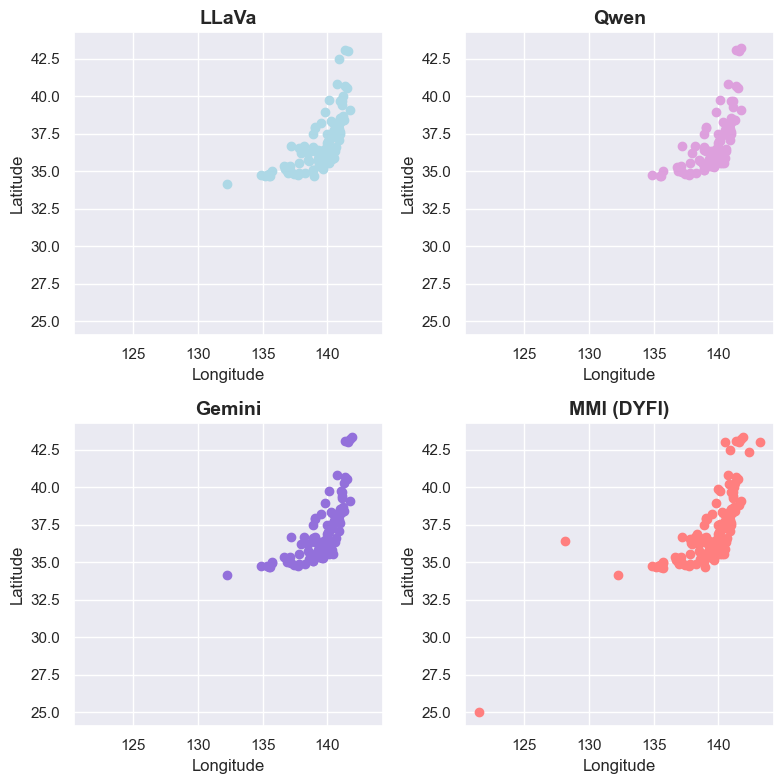

: 

In [116]:
df4 = pd.read_csv('2021_fukushima_DYFI.csv')


# Titles and colors
titles = ["LLaVa", "Qwen", "Gemini", "MMI (DYFI)"]
colors = ['#ADD8E6', '#DDA0DD', '#9370DB', '#FF7F7F']  # Macaron-like pastels

# Group & count logic (assuming you have df1-df4)
def group_and_count(df):
    return df.groupby(['latitude', 'longitude']).size().reset_index(name='count')

grouped_dfs = [group_and_count(df) for df in [df1, df2, df3, df4]]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, (ax, grouped) in enumerate(zip(axes, grouped_dfs)):
    ax.scatter(
        grouped['longitude'], grouped['latitude'],
        #s=grouped['count'] * 10,
        alpha=1,
        color=colors[i],
        #edgecolor='white'
    )
    ax.set_title(titles[i], fontsize=14, weight='bold')
    
    # Force Y-axis ticks for ALL plots
    ax.set_ylabel("Latitude", fontsize=12)
    ax.tick_params(axis='y', labelleft=True)  # ✅ Force latitude tick numbers

    ax.set_xlabel("Longitude", fontsize=12)
    ax.tick_params(axis='x', labelbottom=True)

plt.tight_layout()
plt.show()

